In [1]:
%pip install -U -q "google-genai>=1.0.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 2.5 MB/s eta 0:00:00


In [4]:
from google import genai
from google.colab import userdata

GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
client = genai.Client(api_key=GOOGLE_API_KEY)

In [7]:
MODEL_ID="gemini-2.0-flash" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-pro-exp-03-25"] {"allow-input":true, isTemplate: true}


In [8]:
!pip install -q yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.3 MB/s eta 0:00:00


In [9]:
import yt_dlp

In [10]:
video_url = "https://www.youtube.com/watch?v=3EKpuVedMO0"  # replace with actual URL
ydl_opts = {
    'outtmpl': '/content/cnn_summary_video.%(ext)s',
    'format': 'best[ext=mp4]'
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download([video_url])

video_path = "/content/cnn_summary_video.mp4"

[youtube] Extracting URL: https://www.youtube.com/watch?v=3EKpuVedMO0
[youtube] 3EKpuVedMO0: Downloading webpage
[youtube] 3EKpuVedMO0: Downloading tv client config
[youtube] 3EKpuVedMO0: Downloading player 179bab65-main
[youtube] 3EKpuVedMO0: Downloading tv player API JSON
[youtube] 3EKpuVedMO0: Downloading ios player API JSON
[youtube] 3EKpuVedMO0: Downloading m3u8 information
[info] 3EKpuVedMO0: Downloading 1 format(s): 18
[download] Destination: /content/cnn_summary_video.mp4
[download] 100% of   39.63MiB in 00:00:02 at 16.72MiB/s  


In [12]:
# Upload video
video_file = client.files.upload(file='/content/cnn_summary_video.mp4')

In [13]:
import time
# Wait until the uploaded video is available
while video_file.state.name == "PROCESSING":
  print('.', end='')
  time.sleep(5)
  video_file = client.files.get(name=video_file.name)

if video_file.state.name == "FAILED":
  raise ValueError(video_file.state.name)

....

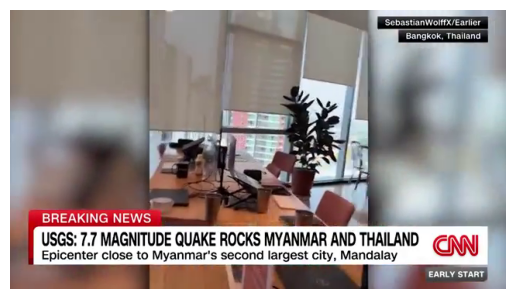

In [16]:
# this is only needed for demonstration purposes
import cv2
import matplotlib.pyplot as plt

# Display some of the video content
cap = cv2.VideoCapture('/content/cnn_summary_video.mp4')
frame_number = 1000
for _ in range(frame_number):
    ret, frame = cap.read()
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

cap.release()

In [17]:
system_prompt = "You should explain quick 2 or 3 sentence summary of what is happening in the video and its impact"

In [18]:
from google.genai import types

MODEL_ID="gemini-2.0-flash" # @param ["gemini-2.0-flash-lite","gemini-2.0-flash","gemini-2.5-pro-exp-03-25"] {"allow-input":true, isTemplate: true}
response = client.models.generate_content(
    model=f"models/{MODEL_ID}",
    contents=[
        "Summarise this video please.",
        video_file
        ],
    config=types.GenerateContentConfig(
        system_instruction=system_prompt,
        ),
    )
print(response.text)

Sure, here's a quick summary of the video you sent:
A large 7.7 magnitude earthquake shook Myanmar and Thailand, leaving at least one person dead, 50 injured in Bangkok, and an entire building collapsed. This is especially dangerous for Myanmar as a nation with civil war issues and little existing infrastructure to withstand strong earthquakes like these.
